## **Text Analysis System for AAC Communication Boards**

## **Objective**
The goal of this project is to develop a text-analysis system that processes an  English text (500 words) and classifies it into grammatical categories.

Beyond identifying these key words, the system creates semantic embeddings that allow for deeper analysis and clustering. This workflow will form the foundation of an AAC (Augmentative and Alternative Communication) system, where categorized and clustered words can be used to build efficient communication boards for individuals with communication difficulties

**Install necessary  dependencies  libraries and data sets**

In [58]:
# Install necessary  dependencies  libraries for the rest of the code
!pip install pdfkit
!apt-get install -y wkhtmltopdf
!python -m spacy download en_core_web_md
import spacy
nlp = spacy.load("en_core_web_md")

import os
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pdfkit
import matplotlib.pyplot as plt
import seaborn as sns
import math
from collections import Counter
from sklearn.cluster import KMeans
from IPython.display import display, HTML
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from urllib.request import urlopen

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
wkhtmltopdf is already the newest version (0.12.6-2).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 30.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [59]:
# Download necessary NLTK datasets
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('omw-1.4')

#  Install wkhtmltopdf
!apt-get install -y wkhtmltopdf

#  Install pdfkit Python package
!pip install pdfkit

#Download and Read the Article
article_url = "https://raw.githubusercontent.com/noakraler/english/refs/heads/main/article"
article_text = urlopen(article_url).read().decode('utf-8')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
wkhtmltopdf is already the newest version (0.12.6-2).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


**text cleaning**

In [60]:
# Define unwanted words that should be removed.
unwanted_words = {"at", "et", "eg", "qol", "asd","al"}


def clean_text(text):
    text = text.lower() #lowercasing
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and numbers
    words = text.split() #spliting into words
    words = [word for word in words if word not in unwanted_words]  # Remove unwanted words
    return ' '.join(words) #return the words into a clean text string

#applies the cleaning function to the input text ans stores it
article_text = clean_text(article_text)
article_text

'introduction health communication researchers have been proactive in investigating a range of barriers to effective communication in healthcare these barriers include poor educational attainment challenging cultural factors and low levels of trust in healthcare institutions rademakers kreuter and mcclure armstrong and yet one of the greatest barriers to effective health communication an inability to communicate as a result of developmental disorders injury or disease has been all but completely overlooked in health communication research this article argues that children and adults with socalled communication disorders require special consideration in healthcare settings and in health communication research the reasons for limited research into people with communication disorders by health communication researchers are twofold first the medical conditions that cause communication disorders require a wide range of knowledge in areas such as neurology anatomy and clinical linguistics th



**Text Processing: Tokenization, POS Tagging, WordNet Lemmatization & Singularization**






In [61]:
def get_wordnet_pos(treebank_tag): # Convert the Treebank POS tag to the corresponding WordNet POS label.

    if treebank_tag.startswith('J'):
        return wordnet.ADJ  # If the tag starts with 'J', return the adjective label.
    elif treebank_tag.startswith('V'):
        return wordnet.VERB  # If the tag starts with 'V', return the verb label.
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN  # If the tag starts with 'N', return the noun label.
    elif treebank_tag.startswith('R'):
        return wordnet.ADV # If the tag starts with 'R', return the adverb label.
    else:
        return None #If the tag doesn't match any, return None.

tokens = word_tokenize(article_text) # Tokenize the input text to individual words.

pos_tags = pos_tag(tokens)  # Tag each token with its corresponding POS


lemmatizer = WordNetLemmatizer()  # Create  WordNet lemmatizer.

def lemmatize_words(words, pos_tags): #takes a list of words and their corresponding POS tags and after it  returns a list of lemmatized words.

    lemmatized_words = []      # Initialize a list to hold lemmatized words.

    # Loop through each word with its corresponding POS tag.
    for word, tag in zip(words, pos_tags):
        wn_tag = get_wordnet_pos(tag)  # Convert the Treebank tag to a WordNet tag.
        if wn_tag:
            lemmatized_words.append(lemmatizer.lemmatize(word, pos=wn_tag))  # If a valid WordNet tag exists, lemmatize the word with it.

        else:
           lemmatized_words.append(lemmatizer.lemmatize(word))    # If not, lemmatize the word using the default method
    return lemmatized_words  # Return the list of lemmatized words.

tokens = lemmatize_words(tokens, [tag for _, tag in pos_tags])   # Extract  the tags from the POS tag pairs and lemmatize the tokens by that.


word_frequencies = Counter(tokens)  # Create a frequency dictionary  for the lemmatized words.


**Frequency counting**

In [62]:
word_frequencies  # Count word occurrences after lemmatization

Counter({'introduction': 1,
         'health': 24,
         'communication': 85,
         'researcher': 4,
         'have': 33,
         'be': 81,
         'proactive': 1,
         'in': 95,
         'investigate': 2,
         'a': 83,
         'range': 3,
         'of': 128,
         'barrier': 4,
         'to': 46,
         'effective': 3,
         'healthcare': 15,
         'these': 19,
         'include': 5,
         'poor': 4,
         'educational': 1,
         'attainment': 1,
         'challenge': 4,
         'cultural': 1,
         'factor': 2,
         'and': 102,
         'low': 4,
         'level': 4,
         'trust': 1,
         'institution': 1,
         'rademakers': 1,
         'kreuter': 1,
         'mcclure': 1,
         'armstrong': 1,
         'yet': 1,
         'one': 4,
         'the': 109,
         'great': 2,
         'an': 20,
         'inability': 1,
         'communicate': 2,
         'result': 1,
         'developmental': 7,
         'disorder': 78,
       

**Syntactic Categorization and Deduplication**

In [63]:
def lemmatize_words(words, pos_tags):
    lemmatized_words = []  # empty list to store lemmatized words
    for word, tag in zip(words, pos_tags):  # repeat through words and their POS tags
        wn_tag = get_wordnet_pos(tag)  # Convert NLTK POS tag to WordNet format
        if wn_tag:
            lemmatized_words.append(lemmatizer.lemmatize(word, pos=wn_tag))
            #if the word's part of speech is known, we lemmatize it more accurately
        else:
            lemmatized_words.append(lemmatizer.lemmatize(word)) # if the word's part of speech is not known, use basic lemmatization.
    return lemmatized_words  # Return the processed list of lemmatized words # Fixed: Indentation aligned with function body

tokens = lemmatize_words(tokens, [tag for _, tag in pos_tags]) # Apply the lemmatization function to all tokens


#  ט this line create a dictionary to group words by their grammatical category
categories = {
    "NOUN": [], "VERB": [], "ADJ": [], "ADV": [], "CONNECTIVES": []
}

# Assign words to syntactic categories based on POS tags
for word, tag in pos_tags:
    if tag in ["CC", "IN"]:  # CC: Coordinating Conjunction, IN: Subordinating Conjunction
        categories["CONNECTIVES"].append(word)  # Store connectives
    elif tag.startswith("NN"): # Noun
        categories["NOUN"].append(word)
    elif tag.startswith("VB"):  # Verb
        categories["VERB"].append(word)
    elif tag.startswith("JJ"): # Adjective
        categories["ADJ"].append(word)
    elif tag.startswith("RB"): # Adverb
        categories["ADV"].append(word)


# Remove Duplicates-the goal is to keep words in NOUN category if multiple POS tags exist
unique_categories = {
    "NOUN": set(categories["NOUN"]),  # Convert list of nouns to a set to remove duplicates
    "VERB": set(categories["VERB"]) - set(categories["NOUN"]),   # Remove words that appear in NOUN
    "ADJ": set(categories["ADJ"]) - set(categories["NOUN"]) - set(categories["VERB"]),   # Ensure unique adjectives
    "ADV": set(categories["ADV"]) - set(categories["NOUN"]) - set(categories["VERB"]) - set(categories["ADJ"]),  # Ensure unique adverbs
    "CONNECTIVES": set(categories["CONNECTIVES"]) - set(categories["NOUN"]) - set(categories["VERB"]) - set(categories["ADJ"]) - set(categories["ADV"]),  # Ensure unique connectives
}

# Convert back to lists
categories = {key: list(words) for key, words in unique_categories.items()}

In [64]:
categories #print categories

{'NOUN': ['tube',
  'information',
  'signals',
  'birthday',
  'presence',
  'alaryngeal',
  'interactions',
  'vocabulary',
  'onset',
  'patients',
  'sound',
  'language',
  'total',
  'effects',
  'risk',
  'activity',
  'emerson',
  'assessments',
  'expertise',
  'journey',
  'deficits',
  'department',
  'larynx',
  'byrd',
  'boy',
  'day',
  'world',
  'meanings',
  'stransky',
  'character',
  'anatomy',
  'limitations',
  'cleft',
  'burdens',
  'ways',
  'aspects',
  'cohen',
  'healthcare',
  'page',
  'lives',
  'covariates',
  'instrument',
  'fields',
  'moderate',
  'medicine',
  'model',
  'movements',
  'part',
  'work',
  'speaker',
  'attempt',
  'issues',
  'morris',
  'negation',
  'others',
  'ward',
  'step',
  'processes',
  'space',
  'signal',
  'year',
  'pathologists',
  'deficit',
  'leisure',
  'achievement',
  'diseases',
  'word',
  'case',
  'clients',
  'communication',
  'states',
  'characterize',
  'basis',
  'adolescence',
  'caseloads',
  'medi

**Frequency Analysis: Extracting and Displaying Top Frequent Words by Category**

In [65]:
# Frequency Analysis
def get_most_frequent_words(category_words, top_n=12): #this function extracts the top 12 most frequent words from a given category
    return sorted([(word, word_frequencies[word]) for word in category_words if word in word_frequencies], key=lambda x: x[1], reverse=True)[:top_n] # this line sort words by frequency and keep to top 12

# function to each syntactic category and store the results in a dictionary
frequent_words = {cat: get_most_frequent_words(words, top_n=12) for cat, words in categories.items()}

# Display frequency counts for each category
for category, words in frequent_words.items():  # repate through each category and its words
    print(f"{category} ({len(words)} words): {', '.join([f'{word} ({count})' for word, count in words])}\n")  # Print category name, number of words selected, and their frequency


NOUN (12 words): communication (85), disorder (78), adult (43), language (39), child (32), year (26), health (24), speech (24), report (19), healthcare (15), age (15), life (15)

VERB (12 words): be (81), have (33), address (6), process (6), take (6), produce (6), include (5), assess (5), examine (4), do (4), stutter (4), encounter (3)

ADJ (12 words): high (11), more (7), several (7), developmental (7), clinical (6), first (6), old (5), medical (5), general (5), many (5), poor (4), low (4)

ADV (12 words): also (12), only (10), not (9), there (7), even (5), still (4), approximately (3), significantly (2), no (2), often (2), almost (2), rather (2)

CONNECTIVES (12 words): of (128), and (102), in (95), with (60), that (34), or (23), on (17), for (15), by (14), than (10), without (6), while (6)



**Visualization of Word Frequency**




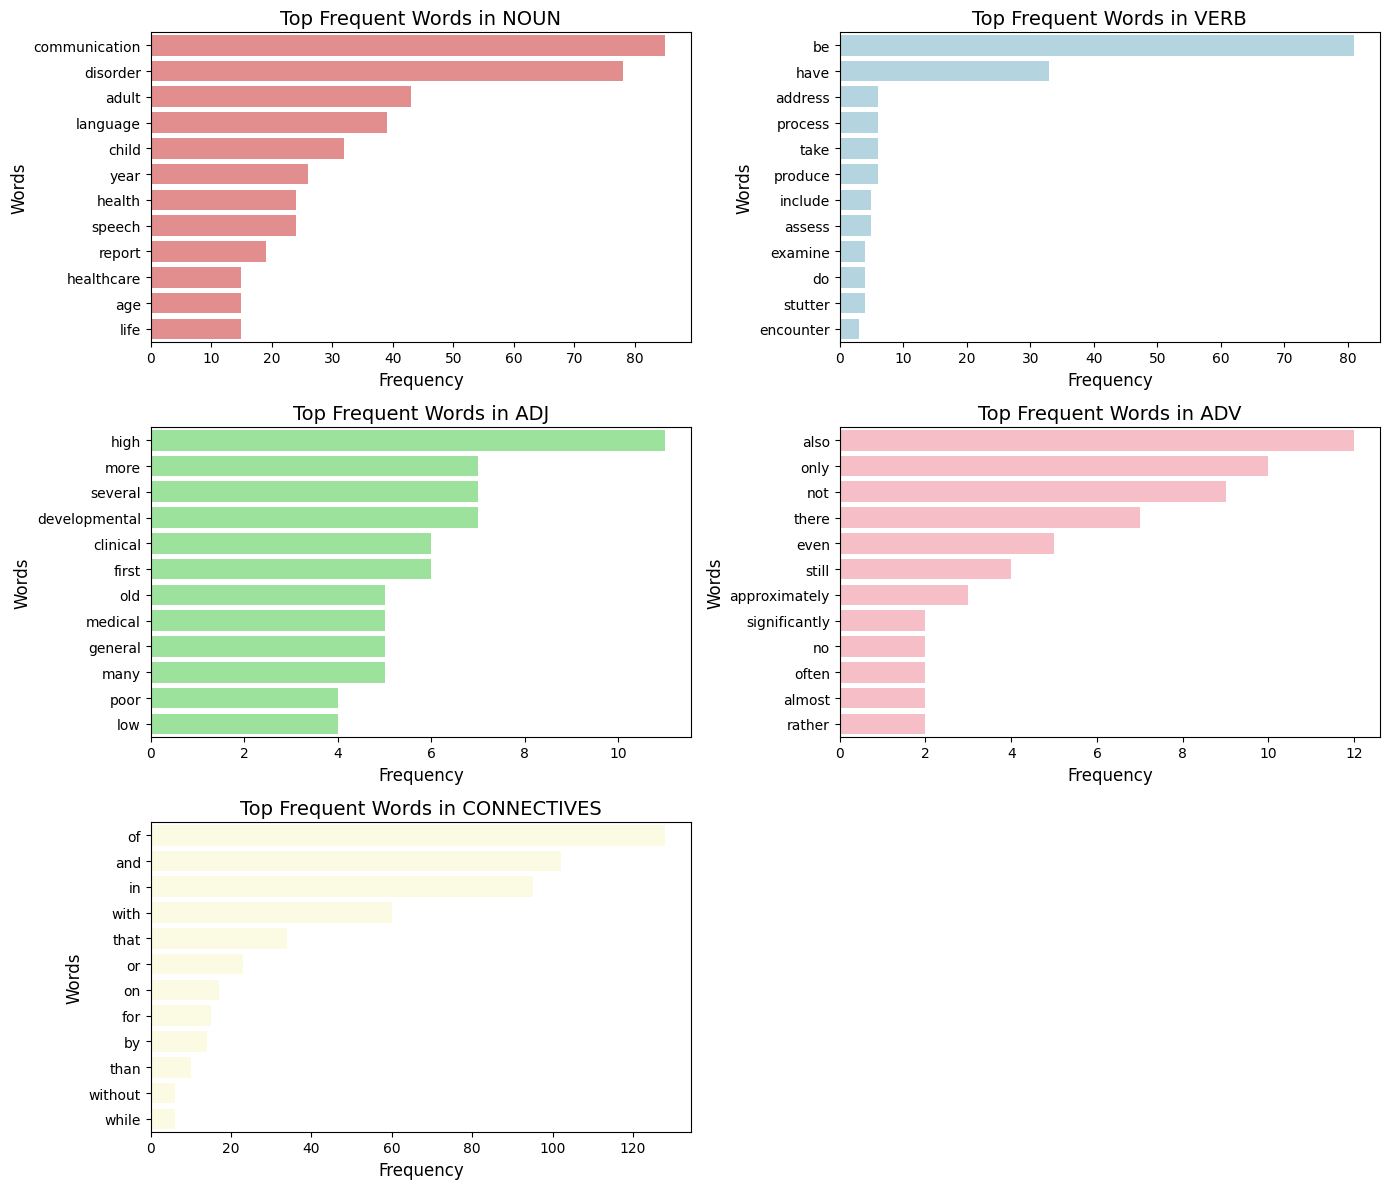

In [66]:
# Visualization of Word Frequency
category_colors = {  # Define colors for each grammatical category
    "NOUN": "lightcoral",
    "VERB": "lightblue",
    "ADJ": "lightgreen",
    "ADV": "lightpink",
    "CONNECTIVES": "lightyellow"
}

# Dynamically determine the number of rows needed
num_categories = len(frequent_words)  # thin line count the number of grammatical categories
rows = math.ceil(num_categories / 2)  #  this line ensure  numbers of rows for a 2-column layout

# Create a figure with multiple  subplots
fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(14, 4 * rows))  # Define subplot grid
axes = axes.flatten()  # Flatten the array of axes

# give each category  a bar chart
for idx, (category, words) in enumerate(frequent_words.items()):
    word_labels, counts = zip(*words)  # extract words and their frequencies

    ax = axes[idx]  # Select the right subplot
    sns.barplot(x=list(counts), y=list(word_labels), ax=ax, color=category_colors[category])  # Create bar plot
    ax.set_title(f"Top Frequent Words in {category}", fontsize=14)  # Set the title
    ax.set_xlabel("Frequency", fontsize=12)  # Label the x-axis
    ax.set_ylabel("Words", fontsize=12)  # Label the y-axis

# Turn off any unused subplots if there are fewer categories than subplots
for idx in range(num_categories, len(axes)):
    fig.delaxes(axes[idx])  # Remove unused subplot spaces

plt.tight_layout()  # Adjust layout to prevent overlap between them
plt.show()  # Display the plot


**Visualizing Category Distribution**

([<matplotlib.patches.Wedge at 0x7a4a5f5cf1d0>,
 [Text(-1.025351117602686, -0.3983153093102537, 'NOUN'),
  Text(0.31256805617627903, -1.0546569159011772, 'VERB'),
  Text(0.8570350742746283, -0.6895584684876856, 'ADJ'),
  Text(1.0378998854817412, -0.3643677094872552, 'ADV'),
  Text(0.46915424166055475, 0.9949343181999051, 'CONNECTIVES')],
 [Text(-0.5592824277832832, -0.21726289598741108, '34.0%'),
  Text(0.17049166700524307, -0.5752674086733693, '13.4%'),
  Text(0.4674736768770699, -0.37612280099328305, '5.9%'),
  Text(0.5661272102627678, -0.19874602335668465, '4.9%'),
  Text(0.25590231363302984, 0.5426914462908572, '41.8%')])

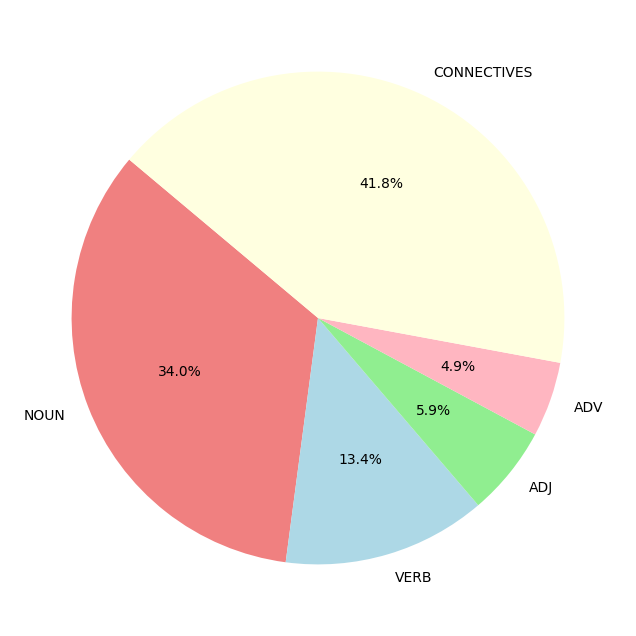

In [67]:
 # make pie Chart for Category Distribution
fig, ax = plt.subplots(figsize=(8, 8))  #  this line create a figure and axis for the pie chart with a fixed size

# this create a dictionary where the key is the category, and the value is the sum of word frequencies in that category
category_sizes = {cat: sum([count for _, count in words]) for cat, words in frequent_words.items() if words}

labels, sizes = zip(*category_sizes.items())  #  this line extract labels  and sizes

ax.pie(sizes, labels=labels, autopct='%1.1f%%',   #  this line assigns category names to each slice and displays percentage values on the chart
       colors=[category_colors[cat] for cat in labels], startangle=140)  #  this line assigns colors to categories and impoving the pie layout by rotated it


**Semantic Clustering**

In [69]:
def cluster_words(words, word_frequencies): #This line defines a function named `cluster_words` that takes two parameters: a list of words and their frequency data.

    n_clusters = 3  # Defines the number of clusters to be 3
    if len(words) != 12: #Check if there are exactly 12 words.
        raise ValueError("The input must contain exactly 12 words.") # make sure we always have exactly 12 words

    #  word embeddings
    valid_words = [word for word in words if nlp(word).vector_norm > 0]  # Filters out words without valid embeddings
    vectors = np.array([nlp(word).vector for word in valid_words])  ## Create an array of vectors for each valid word

    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)  # Apply KMeans clustering with some parameters
    labels = kmeans.fit_predict(vectors)  #gets cluster labels for each word

    # Assign words to clusters
    clustered_words = {i: [] for i in range(n_clusters)}  # make a dictionary to store words in each cluster
    for word, cluster in zip(valid_words, labels): # For each valid word and its cluster label, process them together.
        clustered_words[cluster].append(word)  # this line is placing every word to  its assigned cluster

    sorted_clusters = sorted(clustered_words.values(), key=len, reverse=True)  # Sorts clusters by size (largest first)
    flattened = sum(sorted_clusters, [])   # this  move all clusters into one list


    # # Divide the flattened list into groups of 4 words each, one group per cluster.
    final_clusters = {i: flattened[i*4:(i+1)*4] for i in range(n_clusters)}

    # Sort words within each cluster by frequency (highest first)
    for cluster_id in final_clusters:
        final_clusters[cluster_id] = sorted(final_clusters[cluster_id],
                                           key=lambda w: word_frequencies[w],
                                           reverse=True)

    return final_clusters ## Return the dictionary containing the final cluster

# Apply clustering to all categories, using the top 12 frequent words
clustered_words = {
    cat: cluster_words([word for word, _ in words[:12]], word_frequencies)
    for cat, words in frequent_words.items()
}

# Print final clusters
for category, clusters in clustered_words.items():
    print(f"\nCategory: {category}")
    for cluster_id, words in clusters.items():
        print(f"  Cluster {cluster_id}: {', '.join(words)}")



Category: NOUN
  Cluster 0: disorder, adult, child, health
  Cluster 1: communication, language, report, life
  Cluster 2: year, speech, age, healthcare

Category: VERB
  Cluster 0: be, have, address, do
  Cluster 1: process, take, stutter, encounter
  Cluster 2: produce, include, assess, examine

Category: ADJ
  Cluster 0: more, several, first, old
  Cluster 1: developmental, general, many, poor
  Cluster 2: high, clinical, medical, low

Category: ADV
  Cluster 0: only, not, there, even
  Cluster 1: still, no, almost, rather
  Cluster 2: also, approximately, often, significantly

Category: CONNECTIVES
  Cluster 0: of, in, with, or
  Cluster 1: and, for, by, than
  Cluster 2: that, on, without, while


**building the AAC**

In [70]:
# Define category colors and assign a specific color for each one of them
category_colors = {
    "NOUN": "#FFDDC1",  # NOUN category
    "VERB": "#C1FFD7",  #  VERB category
    "ADJ": "#C1D9FF",  # adjective category
    "ADV": "#FFD1DC",   # adverb category
    "CONNECTIVES": "#E2C1FF"    #  CONNECTIVES category
}

#  building the HTML table
html_output = """
<html>
<head>
<style>
    table {border-collapse: collapse; width: 100%;}  /* Set table to collapse borders and span full width */
    th, td {border: 1px solid black; padding: 8px; text-align: center;}  /* Style table headers and cells */
    th {background-color: #f2f2f2;}  /* Set background color for table headers */
    .category-noun {background-color: #FFDDC1;}  /* CSS class for NOUN category styling */
    .category-verb {background-color: #C1FFD7;}  /* CSS class for VERB category styling */
    .category-adj {background-color: #C1D9FF;}   /* CSS class for ADJ category styling */
    .category-adv {background-color: #FFD1DC;}   /* CSS class for ADV category styling */
    .category-connectives {background-color: #E2C1FF;}  /* CSS class for CONNECTIVES category styling */
</style>
</head>
<body>
<table>
<tr><th colspan='18'>AAC </th></tr>
"""

for category, clusters in clustered_words.items():  # Loop through each syntactic category and its clusters
    css_class = f"category-{category.lower()}"  # Generate a CSS class name based on the lowercase category name

    html_output += f"<tr><th colspan='18' class='{css_class}'>{category}</th></tr><tr>"    # Add category headlines


    # Loop through the 3 clusters
    for cluster_id, words in clusters.items():  # Loop through each cluster within the current category
        for word in words:  # Loop through each word in the current cluster
            html_output += f"<td class='{css_class}'>{word}</td>"
            # Add a table cell for each word with the corresponding CSS class

        # Add thick border to separate clusters visually
        html_output += "<td style='border-right: 3px solid black;'></td>"
        # Insert an extra cell with a thick right border to visually separate clusters

    html_output += "</tr>"  # Close the current row for the category

html_output += "</table></body></html>"  # Complete the HTML by closing the table, body, and html tags

# Display the table
display(HTML(html_output))  # Render and display the constructed HTML table in the notebook

**Converting to a PDF file and downloading it**

In [71]:
from google.colab import files # Import the files module from google.colab

html_table = html_output   # Assigns the HTML string (stored in 'html_output') to 'html_table'.

# Opens 'output.html' in write mode and writes the HTML string into it.
with open("output.html", "w", encoding="utf-8") as f:
    f.write(html_table)

config = pdfkit.configuration(wkhtmltopdf="/usr/bin/wkhtmltopdf")  # Configures pdfkit to use the wkhtmltopdf binary located at '/usr/bin/wkhtmltopdf'.

pdfkit.from_file("output.html", "output.pdf", configuration=config) # Converts 'output.html' to 'output.pdf' using the specified configuration.
print("PDF exported as output.pdf") # Prints a confirmation message

files.download("output.pdf") # Initiates download of 'output.pdf' in Google Colab.

PDF exported as output.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>